# Árvores II - Tarefa I


Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Carregar features.txt
features = pd.read_csv('/content/dataset/features.txt', delim_whitespace=True, header=None, usecols=[1], names=['feature'])
feature_names = features['feature'].values

# Carregar subject_train.txt
subject_train = pd.read_csv('/content/dataset/train/subject_train.txt', header=None, names=['subject'])

# Carregar X_train.txt
X_train = pd.read_csv('/content/dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Atribuir os nomes das colunas com base em features.txt
X_train.columns = feature_names

# Adicionar a coluna do indivíduo
X_train['subject'] = subject_train['subject']

# Criar um índice duplo (ordem dos dados, identificador do indivíduo)
X_train.index = pd.MultiIndex.from_arrays([X_train.index, X_train['subject']], names=['order', 'subject'])

# Exibir as 5 primeiras linhas para conferir
print(X_train.head())


<ipython-input-22-c4522125ca60>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('/content/dataset/features.txt', delim_whitespace=True, header=None, usecols=[1], names=['feature'])
<ipython-input-22-c4522125ca60>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/dataset/train/X_train.txt', delim_whitespace=True, header=None)


               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
order subject                                                            
0     1                 0.288585          -0.020294          -0.132905   
1     1                 0.278419          -0.016411          -0.123520   
2     1                 0.279653          -0.019467          -0.113462   
3     1                 0.279174          -0.026201          -0.123283   
4     1                 0.276629          -0.016570          -0.115362   

               tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
order subject                                                         
0     1               -0.995279         -0.983111         -0.913526   
1     1               -0.998245         -0.975300         -0.960322   
2     1               -0.995380         -0.967187         -0.978944   
3     1               -0.996091         -0.983403         -0.990675   
4     1               -0.998139         -0.980817      

In [23]:
# Carregar subject_test.txt
subject_test = pd.read_csv('/content/dataset/test/subject_test.txt', header=None, names=['subject'])

# Carregar X_test.txt
X_test = pd.read_csv('/content/dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Atribuir os nomes das colunas com base em features.txt
X_test.columns = feature_names

# Adicionar a coluna do sujeito
X_test['subject'] = subject_test['subject']

# Criar índice duplo (ordem dos dados, identificador do sujeito)
X_test.index = pd.MultiIndex.from_arrays([X_test.index, X_test['subject']], names=['order', 'subject'])

# Exibir as 5 primeiras linhas
print(X_test.head())


<ipython-input-23-e9d55f22350f>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/dataset/test/X_test.txt', delim_whitespace=True, header=None)


               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
order subject                                                            
0     2                 0.257178          -0.023285          -0.014654   
1     2                 0.286027          -0.013163          -0.119083   
2     2                 0.275485          -0.026050          -0.118152   
3     2                 0.270298          -0.032614          -0.117520   
4     2                 0.274833          -0.027848          -0.129527   

               tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
order subject                                                         
0     2               -0.938404         -0.920091         -0.667683   
1     2               -0.975415         -0.967458         -0.944958   
2     2               -0.993819         -0.969926         -0.962748   
3     2               -0.994743         -0.973268         -0.967091   
4     2               -0.993852         -0.967445      

In [25]:
# Selecionar apenas as 3 colunas desejadas
selected_columns = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Filtrar colunas no X_train e X_test
X_train_reduced = X_train[selected_columns].copy()
X_test_reduced = X_test[selected_columns].copy()

# Salvar com índice duplo em CSV
X_train_reduced.to_csv('/content/train_reduced.csv')
X_test_reduced.to_csv('/content/test_reduced.csv')


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [26]:
# Carregar os dados reduzidos
X_train = pd.read_csv('/content/dataset/train_reduced.csv', index_col=[0, 1])
X_test = pd.read_csv('/content/dataset/test_reduced.csv', index_col=[0, 1])

# Carregar y_train e y_test
y_train = pd.read_csv('/content/dataset/train/y_train.txt', header=None).squeeze()
y_test = pd.read_csv('/content/dataset/test/y_test.txt', header=None).squeeze()

# Ajustar árvore com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [27]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Filtrar apenas valores positivos e únicos
ccp_alphas = pd.Series(ccp_alphas)
ccp_alphas = ccp_alphas[ccp_alphas > 0].unique()


In [28]:
# Selecionar 1 a cada 5 valores
ccp_alphas_reduzidos = ccp_alphas[::5]

# Exibir os primeiros valores reduzidos
print("ccp_alphas reduzidos:", ccp_alphas_reduzidos)


ccp_alphas reduzidos: [6.96674540e-06 4.63397246e-05 6.73768888e-05 8.28222484e-05
 1.02953015e-04 1.20580361e-04 1.41963138e-04 1.51968146e-04
 1.67323005e-04 1.81439304e-04 1.96526409e-04 2.03119333e-04
 2.05888258e-04 2.11960464e-04 2.26826797e-04 2.39444770e-04
 2.47932477e-04 2.52885177e-04 2.62495937e-04 2.73408734e-04
 2.83037295e-04 2.87980319e-04 3.13171720e-04 3.26787621e-04
 3.51668945e-04 3.73564446e-04 3.99220300e-04 4.29862753e-04
 4.51528412e-04 4.63079099e-04 4.87208882e-04 5.11794978e-04
 5.25732429e-04 5.56286552e-04 6.37883381e-04 7.02050790e-04
 7.53735819e-04 8.64950391e-04 9.29376560e-04 1.13240843e-03
 1.24197638e-03 1.65230695e-03 2.18765587e-03 2.66788979e-03
 3.13001880e-03 4.73006126e-03 1.05395082e-02]


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [29]:
%%time

# Inicializar listas
modelos = []
acuracia_treino = []
acuracia_teste = []

# Treinar uma árvore para cada alpha
for alpha in ccp_alphas_reduzidos:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    modelos.append(clf)

    # Acurácias
    acc_train = accuracy_score(y_train, clf.predict(X_train))
    acc_test = accuracy_score(y_test, clf.predict(X_test))

    acuracia_treino.append(acc_train)
    acuracia_teste.append(acc_test)


CPU times: user 2.29 s, sys: 0 ns, total: 2.29 s
Wall time: 2.32 s


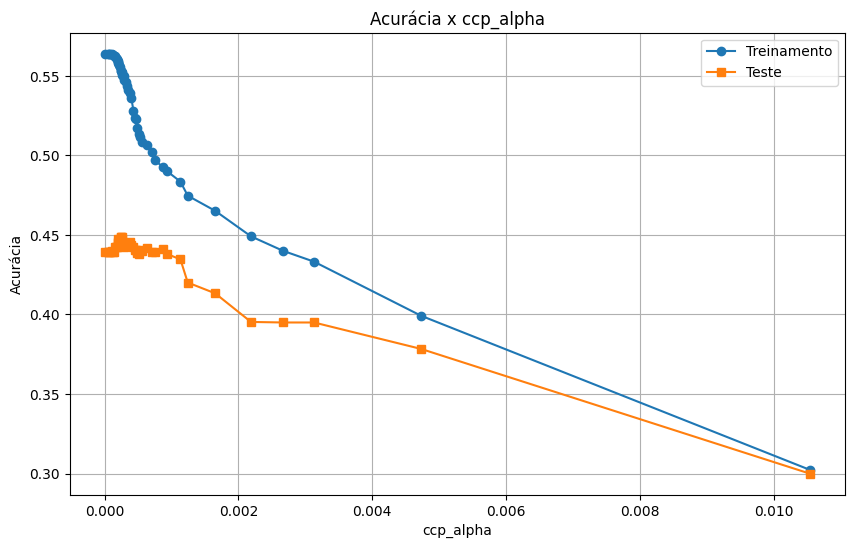

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_reduzidos, acuracia_treino, marker='o', label='Treinamento')
plt.plot(ccp_alphas_reduzidos, acuracia_teste, marker='s', label='Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia x ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Índice da melhor acurácia no teste
melhor_indice = max(range(len(acuracia_teste)), key=lambda i: acuracia_teste[i])
melhor_arvore = modelos[melhor_indice]
melhor_ccp_alpha = ccp_alphas_reduzidos[melhor_indice]
melhor_acuracia = acuracia_teste[melhor_indice]

print(f"Melhor ccp_alpha: {melhor_ccp_alpha}")
print(f"Melhor acurácia na base de teste: {melhor_acuracia:.4f}")


Melhor ccp_alpha: 0.00023944476959803082
Melhor acurácia na base de teste: 0.4486


O modelo apresentou ~45% de acurácia, não é muito alto porém só usamos 3 colunas. Isso significa que existe um grande potencial ao explorar mais colunas.